<a href="https://colab.research.google.com/github/jamesbrowne98/jamesbrowne98/blob/main/CW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import io
from google.colab import files
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [4]:
data = pd.read_excel("ENB2012_data.xlsx")
print(data)

       X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0    0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1    0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2    0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3    0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4    0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28
..    ...    ...    ...     ...  ...  ..  ...  ..    ...    ...
763  0.64  784.0  343.0  220.50  3.5   5  0.4   5  17.88  21.40
764  0.62  808.5  367.5  220.50  3.5   2  0.4   5  16.54  16.88
765  0.62  808.5  367.5  220.50  3.5   3  0.4   5  16.44  17.11
766  0.62  808.5  367.5  220.50  3.5   4  0.4   5  16.48  16.61
767  0.62  808.5  367.5  220.50  3.5   5  0.4   5  16.64  16.03

[768 rows x 10 columns]


In [6]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler


inputs = data.values[:,:8].astype(float)
print(np.shape(inputs))

#Normalize the inputs
scaler = MinMaxScaler()
scaled = scaler.fit_transform(inputs)

print(inputs.ptp(axis=0))
print(scaled.ptp(axis=0))



(768, 8)
[  0.36 294.   171.5  110.25   3.5    3.     0.4    5.  ]
[1. 1. 1. 1. 1. 1. 1. 1.]


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel("ENB2012_data.xlsx")
x = df.iloc[:,1:2].values
y = df.iloc[:,2].values
df


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


Random Forest Regressor

In [11]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(inputs, scaled)
outputs = regressor.predict(inputs)
print("Random Forest Regressor: \n", outputs)

Random Forest Regressor: 
 [[0.96333333 0.0275     0.30285714 ... 0.04       0.0475     0.042     ]
 [0.97888889 0.01583333 0.29714286 ... 0.29666667 0.0325     0.034     ]
 [0.97666667 0.0175     0.29857143 ... 0.72333333 0.03       0.03      ]
 ...
 [0.02       0.97       0.66285714 ... 0.32666667 1.         0.968     ]
 [0.01       0.985      0.68857143 ... 0.66666667 1.         0.982     ]
 [0.01277778 0.98083333 0.68142857 ... 1.         1.         0.972     ]]


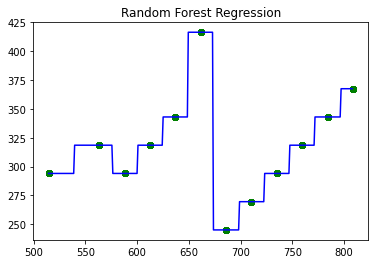

In [12]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=50, random_state=0)
regressor.fit(x,y)
y_pred = regressor.predict([[10]])
x_grid = np.arange(min(x),max(x), 0.9)

x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(x,y, color = "green")
plt.plot(x_grid, regressor.predict(x_grid), color = "blue")
plt.title("Random Forest Regression")
plt.show()

MLP Regressor

In [13]:
from sklearn.neural_network import MLPRegressor
regressor = MLPRegressor(max_iter=5000)
regressor.fit(inputs, scaled)
outputs = regressor.predict(inputs)
print("MLP Regressor: \n", outputs)


MLP Regressor: 
 [[ 0.54962759  0.05016525  0.63859695 ...  0.67232787  0.48836167
   0.26926691]
 [ 0.55318796  0.04784215  0.49718287 ...  0.86006329  0.46269235
   0.24839692]
 [ 0.55674833  0.04551906  0.35576879 ...  1.04779871  0.43702304
   0.22752694]
 ...
 [-0.17677778  0.77201729  0.66139571 ...  0.39168304  0.38267254
   0.7583369 ]
 [-0.14848975  0.76612349  0.54023913 ...  0.61305116  0.37663766
   0.7189939 ]
 [-0.12020173  0.76022969  0.41908256 ...  0.83441927  0.37060277
   0.67965091]]


In [14]:
from sklearn.metrics import mean_absolute_error
regressor = MLPRegressor(max_iter=5000)
regressor.fit(inputs, scaled)
outputs = regressor.predict(inputs)
print(mean_absolute_error(outputs, scaled))


0.13337601458486403


In [23]:
from numpy.lib.shape_base import split
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [33]:
from numpy.ma.core import reshape
from sklearn.base import ClassifierMixin
#split the data to training and testing
xtrain, xtest, ttrain, ttest = train_test_split(outputs, scaled)
#train the classifiers
classifier = SVC(gamma = "auto")
classifier.fit(xtrain, ttrain)
ytrain = classifier(xtrain)
ytest = classifier.predict(xtest)

ValueError: ignored

Support Vector Machine 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_excel("ENB2012_data.xlsx")
df

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [17]:
targetY1 = data["Y1"]
targetY2 = data["Y2"]

x = df.iloc[:, 1:2].values
Y1 = df.iloc[:, 2].values
Y2 = df.iloc[:, 2].values

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
y1 = sc_y.fit_transform(y.reshape(-1, 1))
y2 = sc_y.fit_transform(y.reshape(-1, 1))

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x,Y1,Y2)

SVR()

In [ ]:
regressor.score(x,Y1,Y2)

0.6587552927107829

Part 2 


In [1]:
list = []
f = open("Modules.txt", 'r')
for line in f: list.append(line.split("|"))
f.close()
print(list)

[['MOD001', 'Zacharias Karstensen', '2', 'MOD002,MOD003,MOD004,MOD005,MOD006,MOD007,MOD008,MOD009,MOD010,MOD013\n'], ['MOD002', 'Dominykas Cleary', '2', 'MOD001,MOD003,MOD004,MOD005,MOD006,MOD007,MOD008,MOD009,MOD010,MOD013\n'], ['MOD003', 'Zacharias Karstensen', '2', 'MOD001,MOD002,MOD004,MOD005,MOD006,MOD007,MOD008,MOD009,MOD010,MOD011,MOD012,MOD013\n'], ['MOD004', 'Laila Deniau', '1', 'MOD001,MOD002,MOD003,MOD005,MOD006,MOD007,MOD008,MOD009,MOD010,MOD011,MOD012,MOD013\n'], ['MOD005', 'Brahma O Braonain', '2', 'MOD001,MOD002,MOD003,MOD004,MOD006,MOD007,MOD008,MOD009,MOD010,MOD011,MOD012\n'], ['MOD006', 'Brahma O Braonain', '3', 'MOD001,MOD002,MOD003,MOD004,MOD005,MOD007,MOD008,MOD009,MOD010,MOD011,MOD012\n'], ['MOD007', 'Ruh Kerekes', '1', 'MOD001,MOD002,MOD003,MOD004,MOD005,MOD006,MOD008,MOD009,MOD010,MOD011,MOD014,MOD015,MOD016,MOD017\n'], ['MOD008', 'Brahma O Braonain', '2', 'MOD001,MOD002,MOD003,MOD004,MOD005,MOD006,MOD007,MOD009,MOD010,MOD011,MOD012,MOD014,MOD015\n'], ['MOD009',